In [1]:
import pandas as pd

# Load your dataset

# Load Veremi dataset
dataset_path = 'C:\Dataset\cleaned_DF_with_GA.csv'  # the actual file path
df = pd.read_csv(dataset_path)
print("Original shape:", df.shape)
print("Original classes:\n", df['Class'].value_counts())

Original shape: (11526, 81)
Original classes:
 Class
3    3903
4    2534
2    2044
5    1792
1    1253
Name: count, dtype: int64


In [2]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [3]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Step 7: Feature Scaling (before balancing and splitting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\roame\AppData\Local\Temp\ipykernel_9428\2482742550.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=classes, y=counts, palette=palette)


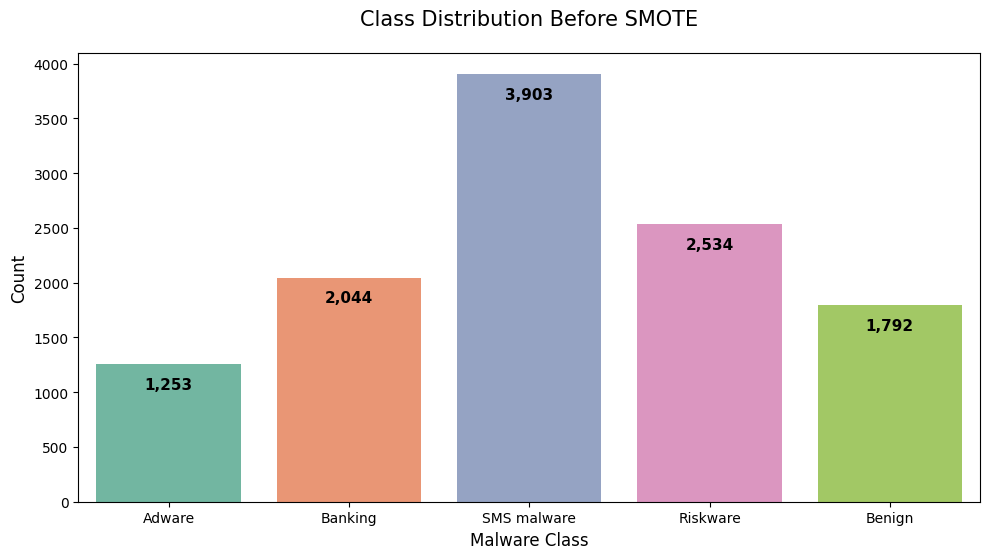

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Example labels (replace 'y' with your actual label data)
label_names = {
    1: "Adware",
    2: "Banking",
    3: "SMS malware",
    4: "Riskware",
    5: "Benign"
}

# Count classes
label_counts = Counter(y)
classes = [label_names[i] for i in label_counts.keys()]
counts = list(label_counts.values())

# Use distinct colors
palette = sns.color_palette("Set2", len(classes))

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=classes, y=counts, palette=palette)

plt.title("Class Distribution Before SMOTE", fontsize=15, pad=20)  # increased title padding
plt.xlabel("Malware Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add count labels slightly below the top
for bar, count in zip(bars.patches, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 250, f"{count:,}",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve space for title
plt.show()


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 7 was: Feature Scaling → X_scaled, y already prepared

# Step 8: Apply SMOTE (Balancing)
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled, y)

print("Applied SMOTE:")
print(f"Before SMOTE: {len(y)} samples")
print(f"After SMOTE:  {len(y_bal)} samples")




c:\Users\roame\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Applied SMOTE:
Before SMOTE: 11526 samples
After SMOTE:  19515 samples


C:\Users\roame\AppData\Local\Temp\ipykernel_9428\1568698573.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=classes, y=counts, palette=palette)


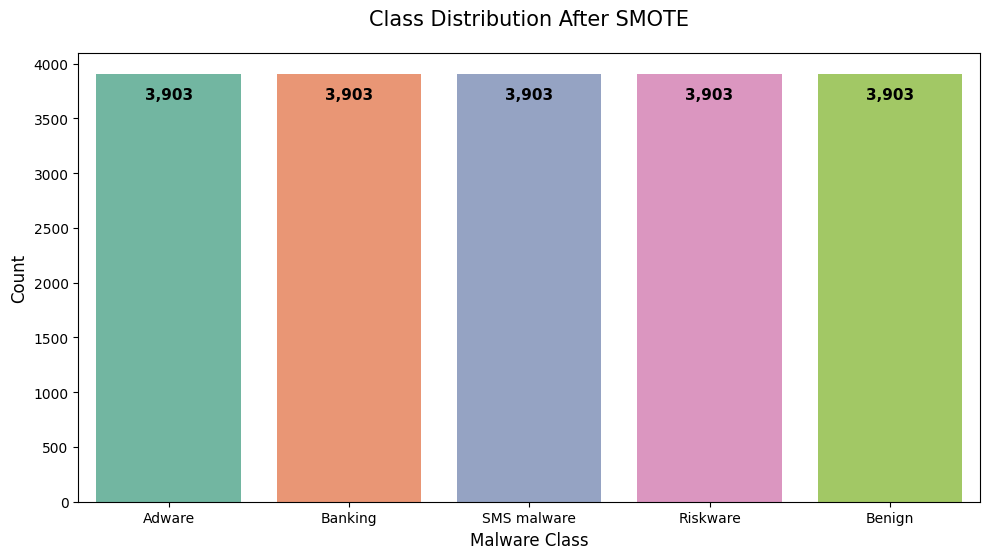

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Label name mapping
label_names = {
    1: "Adware",
    2: "Banking",
    3: "SMS malware",
    4: "Riskware",
    5: "Benign"
}

# Count SMOTE-balanced labels
label_counts = Counter(y_bal)
classes = [label_names[i] for i in label_counts.keys()]
counts = list(label_counts.values())

# Set unique colors for each class
palette = sns.color_palette("Set2", len(classes))

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=classes, y=counts, palette=palette)

plt.title("Class Distribution After SMOTE", fontsize=15, pad=20)
plt.xlabel("Malware Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate counts inside the bars
for bar, count in zip(bars.patches, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 250, f"{count:,}",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Layout fix
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# X_bal, y_bal are the scaled and SMOTE-balanced data

X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

print("Split Complete:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")


Split Complete:
X_train: (15612, 80), y_train: (15612,)
X_test:  (3903, 80), y_test:  (3903,)


C:\Users\roame\AppData\Local\Temp\ipykernel_9428\4051168417.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=train_vals, palette=palette, ax=axes[0])
C:\Users\roame\AppData\Local\Temp\ipykernel_9428\4051168417.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=test_vals, palette=palette, ax=axes[1])


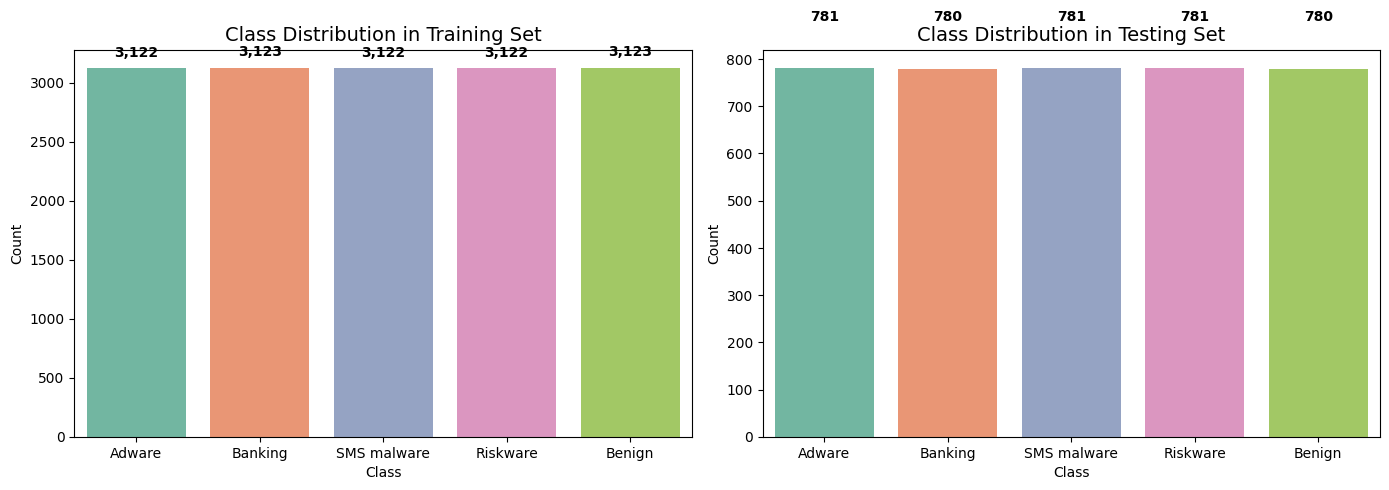

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Mapping from numeric class labels to names
label_names = {
    1: "Adware",
    2: "Banking",
    3: "SMS malware",
    4: "Riskware",
    5: "Benign"
}

def plot_split_class_distribution(y_train, y_test):
    # Count classes
    train_counts = Counter(y_train)
    test_counts = Counter(y_test)
    classes = [label_names[i] for i in sorted(train_counts.keys())]

    train_vals = [train_counts[i] for i in sorted(train_counts.keys())]
    test_vals = [test_counts[i] for i in sorted(test_counts.keys())]

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    palette = sns.color_palette("Set2", len(classes))

    # Training set
    sns.barplot(x=classes, y=train_vals, palette=palette, ax=axes[0])
    axes[0].set_title("Class Distribution in Training Set", fontsize=14)
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")
    for i, val in enumerate(train_vals):
        axes[0].text(i, val + 100, f"{val:,}", ha='center', fontweight='bold')

    # Testing set
    sns.barplot(x=classes, y=test_vals, palette=palette, ax=axes[1])
    axes[1].set_title("Class Distribution in Testing Set", fontsize=14)
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")
    for i, val in enumerate(test_vals):
        axes[1].text(i, val + 100, f"{val:,}", ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Call the function
plot_split_class_distribution(y_train, y_test)


C:\Users\roame\AppData\Local\Temp\ipykernel_9428\1116826084.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x=classes, y=train_vals, palette=palette, ax=axes[0])
C:\Users\roame\AppData\Local\Temp\ipykernel_9428\1116826084.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x=classes, y=test_vals, palette=palette, ax=axes[1])


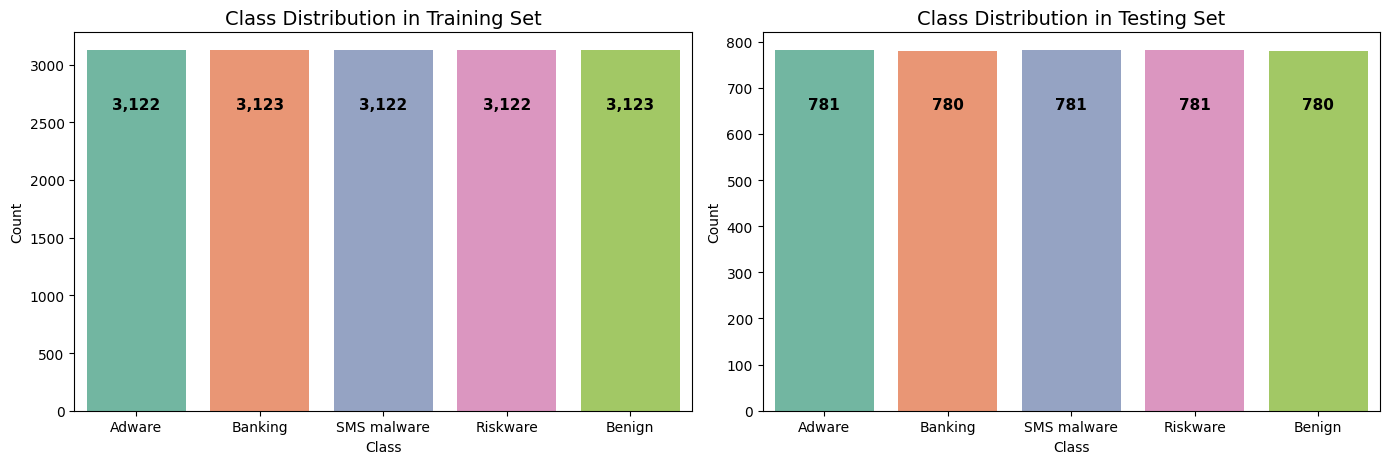

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

label_names = {
    1: "Adware",
    2: "Banking",
    3: "SMS malware",
    4: "Riskware",
    5: "Benign"
}

def plot_split_class_distribution(y_train, y_test):
    train_counts = Counter(y_train)
    test_counts = Counter(y_test)

    classes = [label_names[i] for i in sorted(train_counts.keys())]
    train_vals = [train_counts[i] for i in sorted(train_counts.keys())]
    test_vals = [test_counts[i] for i in sorted(test_counts.keys())]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    palette = sns.color_palette("Set2", len(classes))

    # Training set
    bars1 = sns.barplot(x=classes, y=train_vals, palette=palette, ax=axes[0])
    axes[0].set_title("Class Distribution in Training Set", fontsize=14)
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")
    for bar, val in zip(bars1.patches, train_vals):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height * 0.85, f"{val:,}",
                     ha='center', va='center', fontsize=11, fontweight='bold', color='black')

    # Testing set
    bars2 = sns.barplot(x=classes, y=test_vals, palette=palette, ax=axes[1])
    axes[1].set_title("Class Distribution in Testing Set", fontsize=14)
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")
    for bar, val in zip(bars2.patches, test_vals):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, height * 0.85, f"{val:,}",
                     ha='center', va='center', fontsize=11, fontweight='bold', color='black')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call the function
plot_split_class_distribution(y_train, y_test)


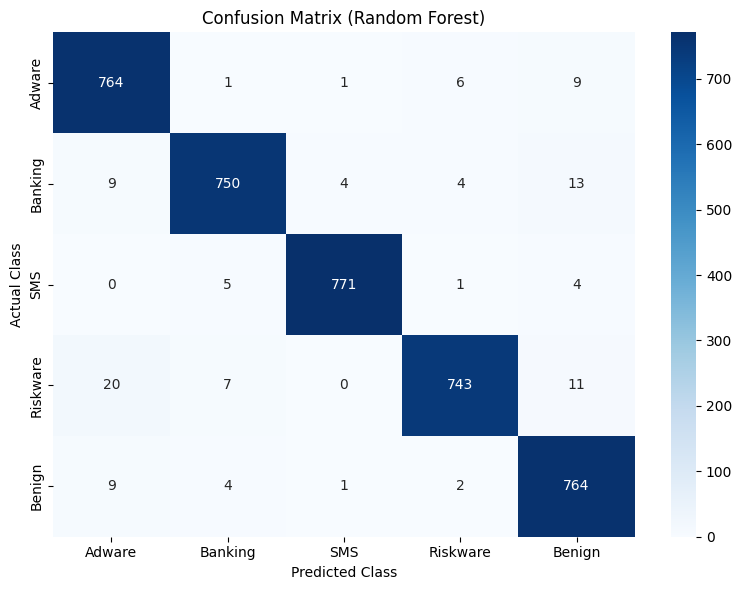


🔍 Overall Accuracy: 0.9716

📋 Per-Class Metrics:
      Class  Precision  Recall  F1-Score  Support     FPR
0    Adware     0.9526  0.9782    0.9653      781  0.0122
1   Banking     0.9778  0.9615    0.9696      780  0.0054
2       SMS     0.9923  0.9872    0.9897      781  0.0019
3  Riskware     0.9828  0.9513    0.9668      781  0.0042
4    Benign     0.9538  0.9795    0.9665      780  0.0118

⏱ Detection Time per Sample: 0.001528 sec/sample


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_recall_fscore_support
)

# Assuming: X_train, y_train, X_test, y_test already available

# ───────────── Train Random Forest ─────────────
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_time = time.time()

# ───────────── Predict ─────────────
y_pred = rf.predict(X_test)

# ───────────── Confusion Matrix ─────────────
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Adware", "Banking", "SMS", "Riskware", "Benign"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.tight_layout()
plt.show()

# ───────────── Global Accuracy ─────────────
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔍 Overall Accuracy: {accuracy:.4f}")

# ───────────── Per-Class Metrics ─────────────
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=[1,2,3,4,5])

# False Positive Rate
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
TN = conf_matrix.sum() - (conf_matrix.sum(axis=1) + FP)
FPR = FP / (FP + TN + 1e-10)  # avoid divide by zero

# Class summary
df_metrics = pd.DataFrame({
    "Class": class_labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Support": support,
    "FPR": FPR
})

# Round values for display
df_metrics[["Precision", "Recall", "F1-Score", "FPR"]] = df_metrics[["Precision", "Recall", "F1-Score", "FPR"]].round(4)
print("\n📋 Per-Class Metrics:")
print(df_metrics)

# ───────────── Detection Time ─────────────
total_time = end_time - start_time
time_per_sample = total_time / len(X_test)
print(f"\n⏱ Detection Time per Sample: {time_per_sample:.6f} sec/sample")



Confusion Matrix (Tabular Format):
          Adware  Banking  SMS  Riskware  Benign
Adware       764        1    1         6       9
Banking        9      750    4         4      13
SMS            0        5  771         1       4
Riskware      20        7    0       743      11
Benign         9        4    1         2     764


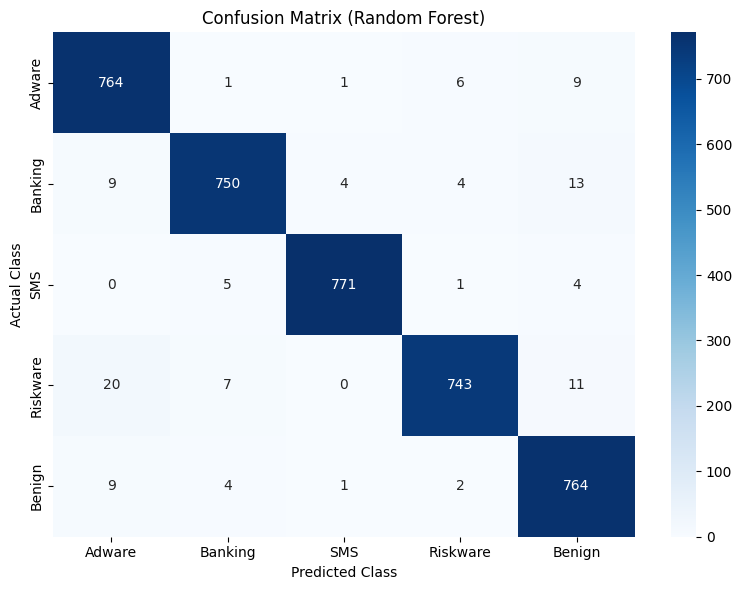

In [11]:
# ───────────── Confusion Matrix ─────────────
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])
class_labels = ["Adware", "Banking", "SMS", "Riskware", "Benign"]

# Print as table (pandas DataFrame)
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("\nConfusion Matrix (Tabular Format):")
print(df_conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.tight_layout()
plt.show()


In [13]:
# Compute TP, FP, FN, TN for each class
TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (TP + FP + FN)

# Create DataFrame
df_conf_details = pd.DataFrame({
    "Class": class_labels,
    "TP": TP,
    "FP": FP,
    "FN": FN,
    "TN": TN
})

print("Confusion Matrix (Random Forest)")
print("\nTP / FP / FN / TN per Class:")
print(df_conf_details)


Confusion Matrix (Random Forest)

TP / FP / FN / TN per Class:
      Class   TP  FP  FN    TN
0    Adware  764  38  17  3084
1   Banking  750  17  30  3106
2       SMS  771   6  10  3116
3  Riskware  743  13  38  3109
4    Benign  764  37  16  3086
